# Constructing Discrete-Time Sequences from Shifted Kronecker Deltas

This notebook shows how to build a discrete-time sequence $x[n]$ as a **weighted sum of shifted Kronecker deltas**:

$$x[n] = \sum_{i} A_i \, \delta[n - n_i]$$

where each term is specified by a pair $(A_i, n_i)$:
- $A_i$: amplitude (weight) of the $i$-th delta
- $n_i$: shift (position) of the $i$-th delta

### The Kronecker Delta Definition

The discrete delta function is defined **explicitly** as:

$$\delta[n - n_0] = \begin{cases} 1 & \text{if } n = n_0 \\ 0 & \text{if } n \neq n_0 \end{cases}$$

We implement this definition directly — no library shortcuts.

## 1. Define the Kronecker Delta from Scratch

We write a pure Python function that returns `1` when $n = n_0$ and `0` otherwise, exactly matching the mathematical definition.

In [1]:
def kronecker_delta(n, n0):
    """
    Kronecker delta: delta[n - n0]
    Returns 1 if n == n0, 0 otherwise.
    """
    if n == n0:
        return 1
    else:
        return 0

# Quick verification
print("delta[0 - 0] =", kronecker_delta(0, 0), " (expected 1)")
print("delta[1 - 0] =", kronecker_delta(1, 0), " (expected 0)")
print("delta[3 - 3] =", kronecker_delta(3, 3), " (expected 1)")
print("delta[2 - 3] =", kronecker_delta(2, 3), " (expected 0)")

delta[0 - 0] = 1  (expected 1)
delta[1 - 0] = 0  (expected 0)
delta[3 - 3] = 1  (expected 1)
delta[2 - 3] = 0  (expected 0)


## 2. Input: Pairs $(A_i, n_i)$

Each pair represents one term $A_i \, \delta[n - n_i]$ in the sum.

**Example:**

$$x[n] = 10\,\delta[n] + 5\,\delta[n-2] + 4\,\delta[n-3] + 6\,\delta[n-4]$$

This is encoded as:

| Term | $A_i$ | $n_i$ |
|------|-------|-------|
| $10\,\delta[n]$   | 10 | 0 |
| $5\,\delta[n-2]$  |  5 | 2 |
| $4\,\delta[n-3]$  |  4 | 3 |
| $6\,\delta[n-4]$  |  6 | 4 |

In [2]:
# Each element is a tuple (A_i, n_i)
terms = [
    (10, 0),  # 10 * delta[n - 0]
    ( 5, 2),  #  5 * delta[n - 2]
    ( 4, 3),  #  4 * delta[n - 3]
    ( 6, 4),  #  6 * delta[n - 4]
]

print("Input terms (A_i, n_i):")
for i, (A, n_i) in enumerate(terms):
    print(f"  Term {i+1}: A={A}, n_i={n_i}  -->  {A} * delta[n - {n_i}]")

Input terms (A_i, n_i):
  Term 1: A=10, n_i=0  -->  10 * delta[n - 0]
  Term 2: A=5, n_i=2  -->  5 * delta[n - 2]
  Term 3: A=4, n_i=3  -->  4 * delta[n - 3]
  Term 4: A=6, n_i=4  -->  6 * delta[n - 4]


## 3. Determine the Valid Index Range

The sequence runs from $n = 0$ to $n = \max(n_i)$. Any index outside this range has no contributing delta, so the sequence is zero there. We compute the range automatically from the input.

In [3]:
n_max = max(n_i for _, n_i in terms)
n_range = list(range(0, n_max + 1))

print(f"Maximum shift: max(n_i) = {n_max}")
print(f"Valid index range: n = 0, 1, ..., {n_max}")
print(f"Indices: {n_range}")

Maximum shift: max(n_i) = 4
Valid index range: n = 0, 1, ..., 4
Indices: [0, 1, 2, 3, 4]


## 4. Evaluate $x[n]$ Step by Step

For **each** index $n$, we:
1. Evaluate every delta $\delta[n - n_i]$ using our explicit definition
2. Multiply by the corresponding amplitude $A_i$
3. Sum all contributions to get $x[n]$

This makes it completely transparent which deltas "activate" (equal 1) at each index.

In [4]:
x = []  # will hold the final sequence values

print("=" * 70)
print("STEP-BY-STEP EVALUATION")
print("=" * 70)

for n in n_range:
    print(f"\n--- n = {n} ---")
    contributions = []
    total = 0

    for i, (A_i, n_i) in enumerate(terms):
        delta_val = kronecker_delta(n, n_i)
        contribution = A_i * delta_val
        contributions.append(contribution)

        status = "ACTIVATES" if delta_val == 1 else "inactive"
        print(f"  Term {i+1}: {A_i} * delta[{n} - {n_i}] = {A_i} * {delta_val} = {contribution}  ({status})")

        total += contribution

    print(f"  Contributions: {contributions}")
    print(f"  x[{n}] = {' + '.join(str(c) for c in contributions)} = {total}")
    x.append(total)

print("\n" + "=" * 70)

STEP-BY-STEP EVALUATION

--- n = 0 ---
  Term 1: 10 * delta[0 - 0] = 10 * 1 = 10  (ACTIVATES)
  Term 2: 5 * delta[0 - 2] = 5 * 0 = 0  (inactive)
  Term 3: 4 * delta[0 - 3] = 4 * 0 = 0  (inactive)
  Term 4: 6 * delta[0 - 4] = 6 * 0 = 0  (inactive)
  Contributions: [10, 0, 0, 0]
  x[0] = 10 + 0 + 0 + 0 = 10

--- n = 1 ---
  Term 1: 10 * delta[1 - 0] = 10 * 0 = 0  (inactive)
  Term 2: 5 * delta[1 - 2] = 5 * 0 = 0  (inactive)
  Term 3: 4 * delta[1 - 3] = 4 * 0 = 0  (inactive)
  Term 4: 6 * delta[1 - 4] = 6 * 0 = 0  (inactive)
  Contributions: [0, 0, 0, 0]
  x[1] = 0 + 0 + 0 + 0 = 0

--- n = 2 ---
  Term 1: 10 * delta[2 - 0] = 10 * 0 = 0  (inactive)
  Term 2: 5 * delta[2 - 2] = 5 * 1 = 5  (ACTIVATES)
  Term 3: 4 * delta[2 - 3] = 4 * 0 = 0  (inactive)
  Term 4: 6 * delta[2 - 4] = 6 * 0 = 0  (inactive)
  Contributions: [0, 5, 0, 0]
  x[2] = 0 + 5 + 0 + 0 = 5

--- n = 3 ---
  Term 1: 10 * delta[3 - 0] = 10 * 0 = 0  (inactive)
  Term 2: 5 * delta[3 - 2] = 5 * 0 = 0  (inactive)
  Term 3: 4 * del

## 5. Full Sequence $x[n]$

After evaluating every index, we collect the results into the complete discrete-time sequence.

In [5]:
print("Sequence x[n]:")
print()
for n, val in zip(n_range, x):
    print(f"  x[{n}] = {val}")

print(f"\nx[n] = {x}")

Sequence x[n]:

  x[0] = 10
  x[1] = 0
  x[2] = 5
  x[3] = 4
  x[4] = 6

x[n] = [10, 0, 5, 4, 6]


## 6. Stem Plot of $x[n]$

A **stem plot** is the standard way to visualize discrete-time signals. Each sample is shown as a vertical line from the horizontal axis to the sample value, with a marker at the top.

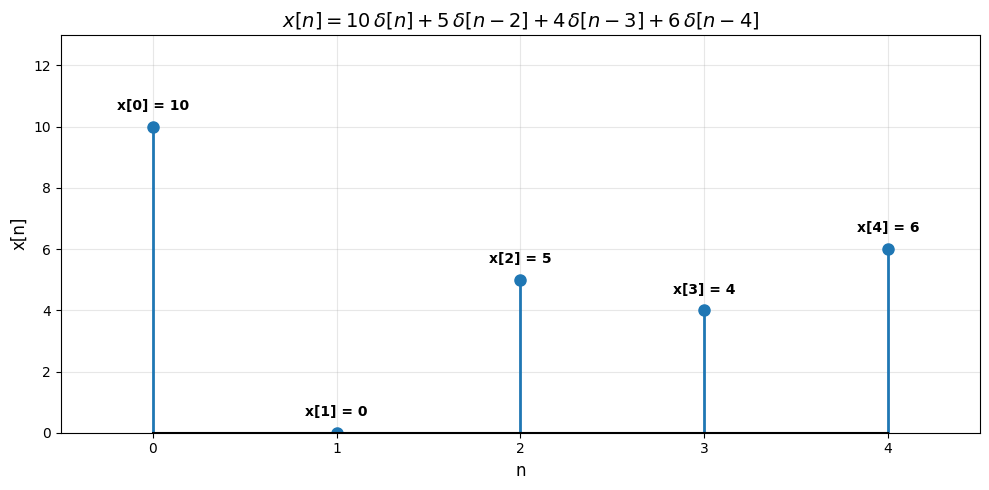

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

markerline, stemlines, baseline = ax.stem(n_range, x, basefmt='k-')
markerline.set_markersize(8)
stemlines.set_linewidth(2)

# Label each point with its value
for n, val in zip(n_range, x):
    ax.annotate(
        f'x[{n}] = {val}',
        xy=(n, val),
        xytext=(0, 12),
        textcoords='offset points',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

ax.set_xlabel('n', fontsize=12)
ax.set_ylabel('x[n]', fontsize=12)
ax.set_title(r'$x[n] = 10\,\delta[n] + 5\,\delta[n-2] + 4\,\delta[n-3] + 6\,\delta[n-4]$', fontsize=14)
ax.set_xticks(n_range)
ax.set_xlim(-0.5, n_max + 0.5)
ax.set_ylim(0, max(x) + 3)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Summary

Given the input:

$$x[n] = 10\,\delta[n] + 5\,\delta[n-2] + 4\,\delta[n-3] + 6\,\delta[n-4]$$

We showed step by step that:

| $n$ | Active delta | $x[n]$ |
|-----|-------------|--------|
| 0   | $\delta[n]$     | 10 |
| 1   | (none)          |  0 |
| 2   | $\delta[n-2]$   |  5 |
| 3   | $\delta[n-3]$   |  4 |
| 4   | $\delta[n-4]$   |  6 |

$$\boxed{x[n] = [10,\; 0,\; 5,\; 4,\; 6]}$$

### Key takeaways

1. The Kronecker delta $\delta[n - n_0]$ acts as a **selector**: it "picks out" a single index $n_0$ and is zero everywhere else.
2. Multiplying by $A_i$ scales the selected value.
3. Summing shifted deltas lets you construct **any** finite-length discrete-time sequence by placing values at arbitrary positions.